In [ ]:
import cv2
import math
import numpy as np
import sys
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage import data
from skimage import io, exposure
from skimage import color
from skimage import img_as_float, img_as_ubyte
import matplotlib.image as mpimg 
import cv2
import imageio


In [ ]:
def histogram_stretching(img, percent):
    # Aseguramos que la imagen tiene 3 canales
    assert img.shape[2] == 3
    # Aseguramos que el porcentaje esta en el rango adecuado
    assert percent > 0 and percent < 100
    # Dividimos el porcentaje para mas tarde encontrar los percentiles
    half_percent = percent / 200.0

    # Partimos la imagen en 3 canales
    channels = cv2.split(img)
    i=0
    out_channels = []
    colors = ['red', 'green', 'blue']
    for channel in channels:
        # Redimensionamos el canal a una dimension y ordenamos
        flat = channel.ravel()
        flat = np.sort(flat)

        # Encontramos los percentiles 
        low_val  = int(np.percentile(flat, half_percent*100))
        high_val = int(np.percentile(flat, (1.0 - half_percent)*100))

        # Definimos una figura para plotear los histogramas
        f,(ax1,ax2)=plt.subplots(ncols=2,figsize=(7,2))

        # Histograma del canal original
        ax1.set_title('Histograma original')
        ax1.hist(channel.ravel(), bins = 256, color = colors[i], alpha = 0.5)
        
        # Calculamos la constante de transformacion
        const = 255.0/(high_val-low_val+1)
        # Aplicamos la transformacion al canal
        channel_out = np.round(const*(channel-low_val)).astype('uint8')

        # Saturamos 
        channel_out[channel<low_val] = 0
        channel_out[channel>high_val] = 255

        # Ploteamos el histograma del canal tras la transformacion
        ax2.set_title('Histograma corregido')
        ax2.hist(channel_out.ravel(), bins = 256, color = colors[i], alpha = 0.5)
        plt.show()
        i+=1
        out_channels.append(channel_out)

    return cv2.merge(out_channels)


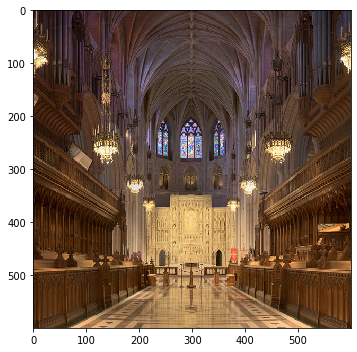

In [ ]:
# imagen original
img_catedral = io.imread('cathedral.jpg') 
#mg = img_as_ubyte(img)
plt.figure(figsize = (10,5))
plt.rc('axes', labelsize=10) 
io.imshow(img_catedral)

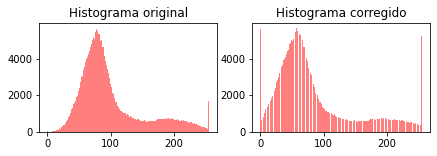

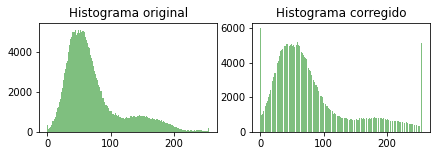

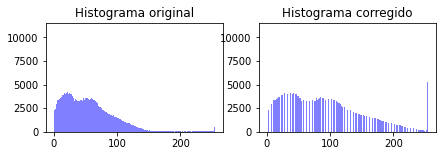

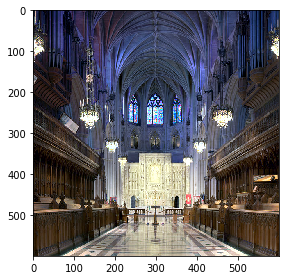

In [ ]:
out_catedral = histogram_stretching(img_catedral, 3)

io.imshow(out_catedral)